# Exercise 11.1

# TESTING OUT SOME FEATURES

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [3]:
m = 2 
b = 1 

np.random.seed(0)
#tf.random.set_seed(0)
#random.seed(0)

x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b  # ideal (target) linear function

sigma = 0.0  # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma)
y_valid = np.random.normal(m * x_valid + b, sigma)

In [4]:
def create_model():
    model = tf.keras.Sequential([tf.keras.Input(shape=(1,)), Dense(1)])
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    return model

## DIFFERENT NUMBER OF EPOCHS

In [71]:
random.seed(0)
epoch_list = [10, 20, 50]
history_list = []
for epochs in epoch_list:
    model = create_model()
    history = model.fit(x=x_train, y=y_train, batch_size=32, shuffle=True, epochs=epochs, validation_data=(x_valid, y_valid), verbose=0)
    history_list.append(history)
    
    print(str(epochs) + ' EPOCHS')
    print('Weights: ')
    print(model.get_weights())
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

10 EPOCHS
Weights: 
[array([[1.3410547]], dtype=float32), array([0.9505369], dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1279 - mse: 0.1279 
Test loss: 0.1375439614057541
Test accuracy: 0.1375439614057541
20 EPOCHS
Weights: 
[array([[1.7026694]], dtype=float32), array([0.9933898], dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0271 - mse: 0.0271 
Test loss: 0.028038695454597473
Test accuracy: 0.028038695454597473
50 EPOCHS
Weights: 
[array([[1.9937024]], dtype=float32), array([0.9998914], dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2227e-05 - mse: 1.2227e-05 
Test loss: 1.2591372069437057e-05
Test accuracy: 1.2591372069437057e-05


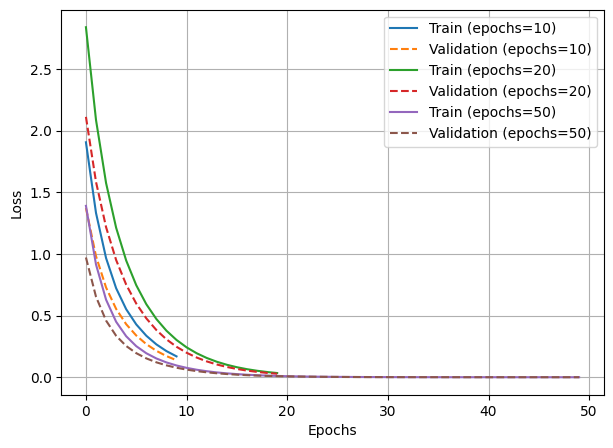

In [58]:
plt.figure(figsize=(7, 5))
for i, epochs in enumerate(epoch_list):
    plt.plot(history_list[i].history['loss'], label='Train (epochs=' + str(epochs) + ')')
    plt.plot(history_list[i].history['val_loss'], label='Validation (epochs='+ str(epochs) + ')', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## DIFFERENT NUMBER OF DATA POINTS

In [63]:
random.seed(0)
size_list = [50, 100, 500]
history_list = []
for size in size_list:
    #generate a data set of each size
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, size)
    x_valid = np.random.uniform(-1, 1, int(size / 10))
    x_valid.sort()
    y_train = np.random.normal(m * x_train + b, sigma)
    y_valid = np.random.normal(m * x_valid + b, sigma)
    #from here it's the same as above
    model = create_model()
    history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)
    history_list.append(history)
    print(str(size) + ' POINTS')
    print('Weights: ')
    print(model.get_weights())
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

50 POINTS
Weights: 
[array([[0.7468848]], dtype=float32), array([0.80489004], dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6165 - mse: 0.6165
Test loss: 0.6164997220039368
Test accuracy: 0.6164997220039368
100 POINTS
Weights: 
[array([[0.84089214]], dtype=float32), array([1.0032395], dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3845 - mse: 0.3845
Test loss: 0.38451164960861206
Test accuracy: 0.38451164960861206
500 POINTS
Weights: 
[array([[1.944316]], dtype=float32), array([0.9989802], dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.5500e-04 - mse: 9.5500e-04 
Test loss: 0.0009841991122812033
Test accuracy: 0.0009841991122812033


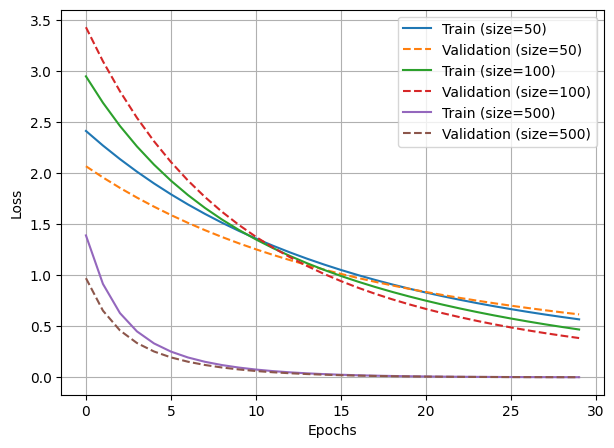

In [64]:
plt.figure(figsize=(7, 5))
for i, size in enumerate(size_list):
    plt.plot(history_list[i].history['loss'], label='Train (size=' + str(size) + ')')
    plt.plot(history_list[i].history['val_loss'], label='Validation (size='+ str(size) + ')', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

From the graph it appears that with a number of points in the hundreds the performance is significatively better, when comparing results with the same number of epochs. In both cases, for the cases of the 50 and 100 points the training error and the validation subside to one another, with a behavior that doesn't look quite right

## DIFFERENT NOISE LEVELS

In [10]:
random.seed(0)
noise_list = [0.0, 0.1, 0.5]
history_list = []
for sigma in noise_list:
    #generate data
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, 500)
    x_valid = np.random.uniform(-1, 1, 50)
    x_valid.sort()
    y_train = np.random.normal(m * x_train + b, sigma)
    y_valid = np.random.normal(m * x_valid + b, sigma)
    #training
    model = create_model()
    history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=50, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)
    history_list.append(history)
    print('$\sigma$ = ' + str(sigma))
    print('Weights: ')
    print(model.get_weights())
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

$\sigma$ = 0.0
Weights: 
[array([[1.9917048]], dtype=float32), array([0.9998955], dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1311e-05 - mse: 2.1311e-05 
Test loss: 2.187021163990721e-05
Test accuracy: 2.187021163990721e-05
$\sigma$ = 0.1
Weights: 
[array([[1.9999813]], dtype=float32), array([0.9883214], dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0113 - mse: 0.0113 
Test loss: 0.01119037251919508
Test accuracy: 0.01119037251919508
$\sigma$ = 0.5
Weights: 
[array([[2.0458195]], dtype=float32), array([0.94793284], dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2825 - mse: 0.2825 
Test loss: 0.27784350514411926
Test accuracy: 0.27784350514411926


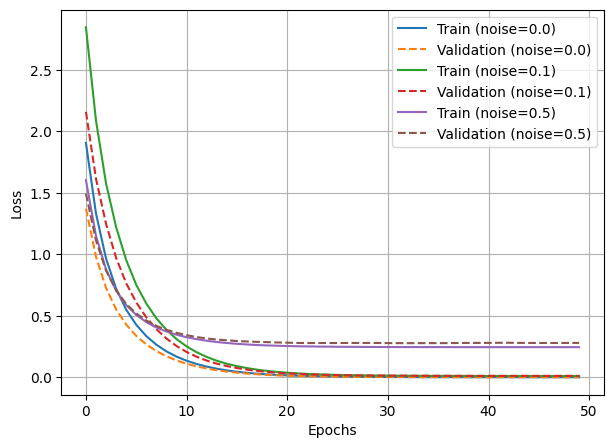

In [9]:
plt.figure(figsize=(7, 5))
for i, sigma in enumerate(noise_list):
    plt.plot(history_list[i].history['loss'], label='Train (noise='+ str(sigma) + ')')
    plt.plot(history_list[i].history['val_loss'], label='Validation (noise='+ str(sigma) + ')', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() 
plt.grid(True)
plt.show()

From this we can see that with a relatively high $\sigma$ the training error behaves for once as we would expect: the entity of the noise appears to overcome the fact that the model is simple enough to make the validation error smaller than the training one. We also have that it does not converge towards zero, with the training seemingly having gone off track. For smaller values of $\sigma$ we have exactly what one would expect, i.e. the blue and orange curves being lower than the green and red one, though both converging to zero